In [1]:
import json
import h5py
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

# Load the prosepectivate sample

In [2]:
data_to_predict = '/home/wentao/UNet-MRI-Reconstruction/data/prospectiveSample.mat'

In [3]:
f = h5py.File(data_to_predict, 'r')

In [4]:
input_data = np.array(f.get('imagesRecon'))

In [5]:
input_data.shape

(10, 128, 128, 20)

# Convert the data into json format and send an API request

In [6]:
data = json.dumps({"instances": input_data.tolist()})

In [7]:
response = requests.post("http://localhost:8501/v1/models/UNet2D1D:predict", data=data)

In [8]:
response

<Response [200]>

In [9]:
print("The time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))

The time taken for each image is 0.3073365s


In [10]:
prediction = np.array(response.json()['predictions'])

In [11]:
prediction.shape

(10, 128, 128, 20)

Text(0.5, 0, 'live_prediction')

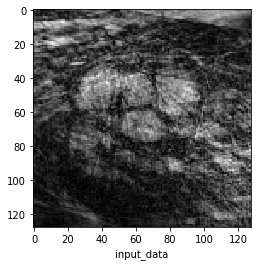

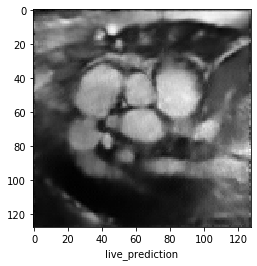

In [12]:
plt.figure(1)
plt.imshow(input_data[0, :, :, 0], cmap='gray')
plt.xlabel('input_data')
plt.figure(2)
plt.imshow(prediction[0, :, :, 0], cmap='gray')
plt.xlabel('live_prediction')